In [1]:
using Plots
using LsqFit; const lsq = LsqFit
using CSV
using DataFrames
using LaTeXStrings
using Printf
using Measurements; const msr = Measurements

Measurements

In [2]:
#- ignore repeated delimiters so that there are not extra columns created by accident
Pb = CSV.read("Pb.pl", DataFrame; decimal = '.', delim = ' ', header = true, ignorerepeated = true) 
energy = Pb.PhotEnergy
absortion = Pb.PhotoelAbsorb


55-element Vector{Float64}:
      1.788e6
 806600.0
 438300.0
 271800.0
 476500.0
 562900.0
 665000.0
 839200.0
 672500.0
 635400.0
 734900.0
 613000.0
 511300.0
      ⋮
     28.41
     18.6
      9.878
      6.226
      5.959
      4.02
      2.863
      1.732
      1.67
      0.9054
      0.5927
      0.4344

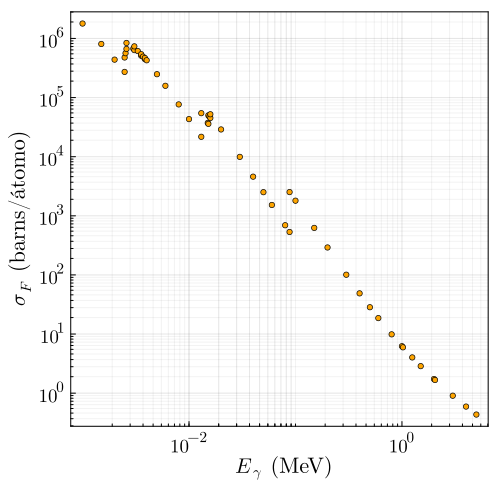

"/hdd/1-PRINCIPAL-2022-1/1-UNIVERSIDAD/1-PHYSICS/4-TENTH_SEMESTER/1-INTRODUCCIÓN A LA INVESTIGACIÓN EXPERIMENTAL/ProblemasExperimental2/phot_abs-vs-photon_energy.pdf"

In [3]:

plot_font = "Computer Modern"
default(fontfamily=plot_font,
        linewidth=2, framestyle=:box, 
        grid=true, minorgrid = true,
        xguidefontsize = 14,
        yguidefontsize = 14,
        xtickfontsize = 12,
        ytickfontsize = 12,
        size = (500,500),
        minorticks = 10,
        xaxis =:log10, 
        yaxis =:log10,
        minorgridwidth = 1.05,
        gridwidth = 1.05,
        mc = :orange, ms = 3, msw = 0.7)

plot_1 = scatter(energy, absortion, 
    xlabel = L" $E_\gamma$"*" (MeV)",
    ylabel = L"$\sigma_F$ "*"(barns/átomo)",
    linewidth = 1,
    label = false)
display(plot_1)
savefig(plot_1, "phot_abs-vs-photon_energy.pdf")

\begin{equation}
    \begin{split}
        \sigma_F(E) = \frac{C}{E^a}\,,\\
        \log{[\sigma_F(E)]} = \log{\frac{C}{E^a}}\,,\\
        \log{[\sigma_F(E)]} = \log{C} - a \log{E}
    \end{split}
\end{equation}

In [4]:
print(last(absortion))
a0 = (log(absortion[1])-log(last(absortion)))/(log(last(energy))-log(energy[1]))
C0 = absortion[1]*energy[1]^a0
p0 = [C0, a0]
model(E, p) = p[1]./(E.^p[2])

xe = LinRange(energy[1],last(energy),1000)


0.4344

1000-element LinRange{Float64, Int64}:
 0.001,0.006004,0.011008,0.016012,0.021016,…,4.97998,4.98499,4.98999,4.995,5.0

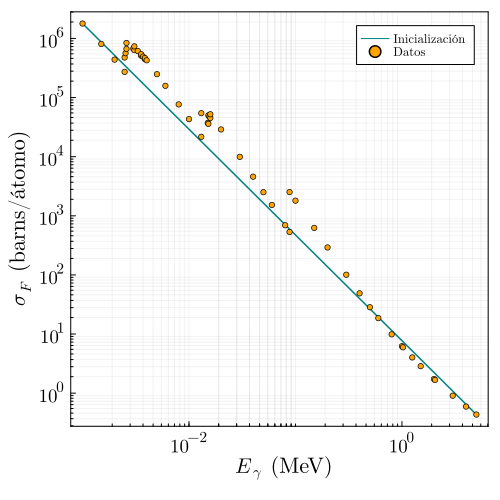

χ²=1.8255089877149133e12
C =7.722965796024165
a =1.788194467683021


"/hdd/1-PRINCIPAL-2022-1/1-UNIVERSIDAD/1-PHYSICS/4-TENTH_SEMESTER/1-INTRODUCCIÓN A LA INVESTIGACIÓN EXPERIMENTAL/ProblemasExperimental2/initialization.pdf"

In [5]:
xe = LinRange(energy[1],last(energy),1000)

plot_font = "Computer Modern"
default(fontfamily=plot_font,
        linewidth=2, framestyle=:box, label=nothing, grid=false)

plot_2 = plot(xe, model(xe, p0),
            xlabel = L" $E_\gamma$"*" (MeV)",
            ylabel = L"$\sigma_F$ "*"(barns/átomo)",
            linewidth = 1.5,
            lc = :teal,
            label = "Inicialización")
plot_2 = scatter!(energy, absortion, 
    markersize = 3, markerstrokecolor = :black, msw = 0.7, mc = :orange,
    label = "Datos")

display(plot_2)
chi_sqr = sum(((absortion - model(energy, p0)).^2))
println("χ²"*"=", chi_sqr)
println("C =", p0[1])
println("a =", p0[2])

savefig(plot_2, "initialization.pdf")

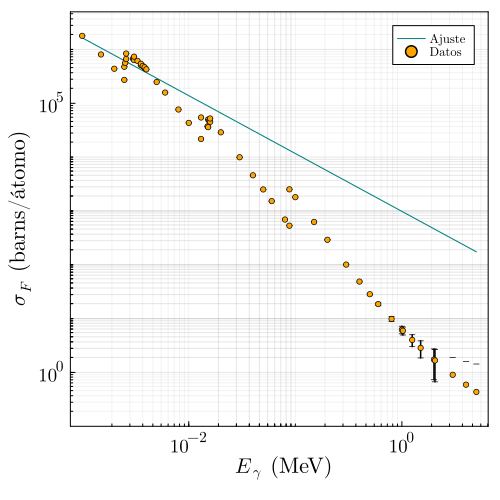

χ²=6.405706260089591e11 ± 6.5e-5
C =981.7291 ± 0.0038
a =1.07464742 ± 6.2e-7


GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


"/hdd/1-PRINCIPAL-2022-1/1-UNIVERSIDAD/1-PHYSICS/4-TENTH_SEMESTER/1-INTRODUCCIÓN A LA INVESTIGACIÓN EXPERIMENTAL/ProblemasExperimental2/Ajuste_1.pdf"

In [13]:
synth_sig = ones(size(absortion))
synth_wt = 1 ./(synth_sig.^2)

fit = lsq.curve_fit(model, energy, absortion, synth_wt, p0)
params = msr.measurement.(fit.param, lsq.stderror(fit))

plot_font = "Computer Modern"
default(fontfamily=plot_font,
        linewidth=2, framestyle=:box, label=nothing, grid=false)

plot_2 = plot(xe, model(xe, msr.value.(params)),
            linewidth = 1.05, lc = :teal,
            label = "Ajuste")
plot_2 = scatter!(energy, absortion, yerror = synth_sig,
    lc = :black,
    xlabel = L" $E_\gamma$"*" (MeV)",
    ylabel = L"$\sigma_F$ "*"(barns/átomo)",  
    linewidth = 1.5,
    ylim = (1E-1, 5E6),
    label = "Datos")

display(plot_2)
chi_sqr = sum(((absortion - model(energy, params)) ./ synth_sig).^2)
println("χ²"*"=", chi_sqr)
println("C =", params[1])
println("a =", params[2])
savefig(plot_2, "Ajuste_1.pdf")



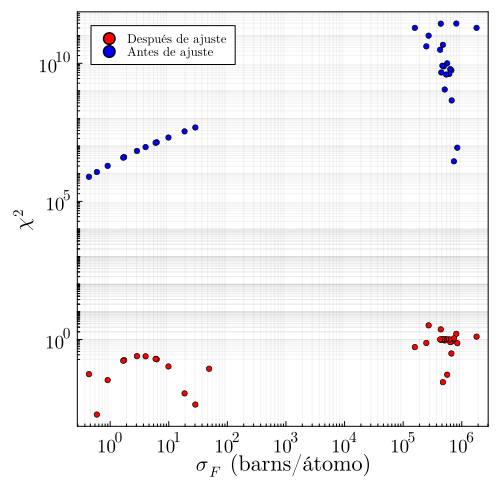

"/hdd/1-PRINCIPAL-2022-1/1-UNIVERSIDAD/1-PHYSICS/4-TENTH_SEMESTER/1-INTRODUCCIÓN A LA INVESTIGACIÓN EXPERIMENTAL/ProblemasExperimental2/Prueba_pesos grandes_1.pdf"

In [10]:


resid_sqr_maxval = []
resid_sqr_minval = []

max_thres = 10e4
min_thres = 10e1
for i in 1:length(absortion)
    if absortion[i]>=max_thres
        push!(resid_sqr_maxval, ((absortion[i] - model(energy[i], msr.value.(params) )) ./ synth_sig[i]).^2)
    elseif absortion[i]<min_thres
        push!(resid_sqr_minval, ((absortion[i] - model(energy[i], msr.value.(params))) ./ synth_sig[i]).^2)
    else
        nothing
    end
end

plot_chis = scatter(absortion[absortion .>= max_thres], resid_sqr_maxval, mc = :red, label = "Después de ajuste")
plot_chis = scatter!(absortion[absortion .< min_thres], resid_sqr_minval, mc= :red)

resid_sqr_maxval = []
resid_sqr_minval = []
for i in 2:length(absortion)
    if absortion[i]>=max_thres
        push!(resid_sqr_maxval, (absortion[i] - model(energy[i], p0)).^2)
    elseif absortion[i]<min_thres
        push!(resid_sqr_minval, (absortion[i] - model(energy[i], p0)).^2)
    else
        nothing
    end
end

abs_min = absortion[absortion .< min_thres]
popfirst!(abs_min)
popfirst!(resid_sqr_minval)

plot_chis = scatter!(absortion[absortion .>= max_thres], resid_sqr_maxval, mc = :blue, label = "Antes de ajuste")
plot_chis = scatter!(abs_min, resid_sqr_minval, mc = :blue, legend = :topleft,
                    ylabel = L"$\chi^2$", xlabel = L"$\sigma_F$"*" (barns/átomo)")

display(plot_chis)
savefig(plot_chis, "Prueba_pesos grandes_1.pdf")

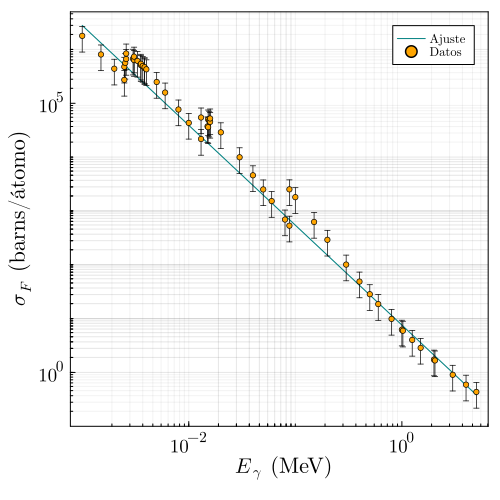

χ²=42.872746504 ± 4.7e-8
C =7.59 ± 0.84
a =1.855 ± 0.026


"/hdd/1-PRINCIPAL-2022-1/1-UNIVERSIDAD/1-PHYSICS/4-TENTH_SEMESTER/1-INTRODUCCIÓN A LA INVESTIGACIÓN EXPERIMENTAL/ProblemasExperimental2/Ajuste_2.pdf"

In [12]:
a0 = (log(absortion[1])-log(last(absortion)))/(log(last(energy))-log(energy[1]))/2
C0 = absortion[1]*energy[1]^a0
p0 = [C0, a0]
model(E, p) = p[1]./(E.^p[2])


synth_sig = 0.5 .*absortion
synth_wt = 1 ./synth_sig.^2

fit = lsq.curve_fit(model, energy, absortion, synth_wt, p0)
params = msr.measurement.(fit.param, lsq.stderror(fit))

plot_font = "Computer Modern"
default(fontfamily=plot_font,
        linewidth=2, framestyle=:box, label=nothing, grid=false)

plot_3 = plot(xe, model(xe, msr.value.(params)),
            linewidth = 1.05, lc = :teal,
            label = "Ajuste")
plot_3 = scatter!(energy, absortion, yerror = synth_sig,
    lc = :black,
    ylim = (1E-1, 5E6),
    xlabel = L" $E_\gamma$"*" (MeV)",
    ylabel = L"$\sigma_F$ "*"(barns/átomo)",
    label = "Datos")

display(plot_3)
chi_sqr = sum(((absortion - model(energy, params)) ./ synth_sig).^2)
println("χ²"*"=", chi_sqr)
println("C =", params[1])
println("a =", params[2])

savefig(plot_3, "Ajuste_2.pdf")

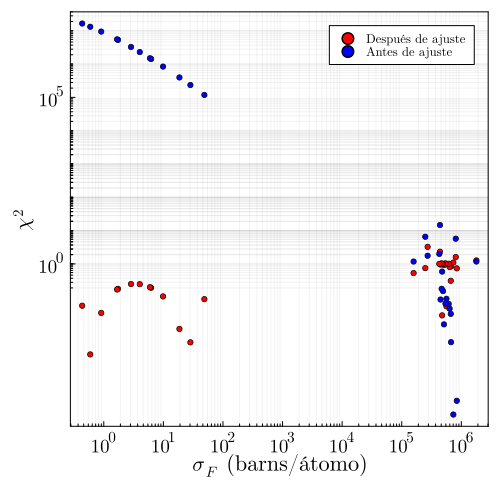

"/hdd/1-PRINCIPAL-2022-1/1-UNIVERSIDAD/1-PHYSICS/4-TENTH_SEMESTER/1-INTRODUCCIÓN A LA INVESTIGACIÓN EXPERIMENTAL/ProblemasExperimental2/Prueba_pesos grandes_2.pdf"

In [9]:
resid_sqr_maxval = []
resid_sqr_minval = []

max_thres = 10e4
min_thres = 10e1
for i in 1:length(absortion)
    if absortion[i]>=max_thres
        push!(resid_sqr_maxval, ((absortion[i] - model(energy[i], msr.value.(params) )) ./ synth_sig[i]).^2)
    elseif absortion[i]<min_thres
        push!(resid_sqr_minval, ((absortion[i] - model(energy[i], msr.value.(params))) ./ synth_sig[i]).^2)
    else
        nothing
    end
end

plot_chis = scatter(absortion[absortion .>= max_thres], resid_sqr_maxval, mc = :red, label = "Después de ajuste")
plot_chis = scatter!(absortion[absortion .< min_thres], resid_sqr_minval, mc= :red)

resid_sqr_maxval = []
resid_sqr_minval = []
for i in 2:length(absortion)
    if absortion[i]>=max_thres
        push!(resid_sqr_maxval, ((absortion[i] - model(energy[i], p0))/synth_sig[i])^2)
    elseif absortion[i]<min_thres
        push!(resid_sqr_minval, ((absortion[i] - model(energy[i], p0))/synth_sig[i])^2)
    else
        nothing
    end
end

plot_chis = scatter!(absortion[absortion .>= max_thres], resid_sqr_maxval, mc = :blue, label = "Antes de ajuste")
plot_chis = scatter!(absortion[absortion .< min_thres], resid_sqr_minval, mc = :blue, legend = :topright,
                    ylabel = L"$\chi^2$", xlabel = L"$\sigma_F$"*" (barns/átomo)")

display(plot_chis)
savefig(plot_chis, "Prueba_pesos grandes_2.pdf")